In [1]:
! pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 294.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 222.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data=raw_df
#Rename Class
data.rename(columns={"Class": "isFraud"}, inplace=True)

#Percentage of fraud
fraud_per = data[data.isFraud == 1].isFraud.count() / data.isFraud.count()
print(fraud_per)

0.001727485630620034


In [7]:
# Looking for missing data
print(data.isnull().any().sum())

0


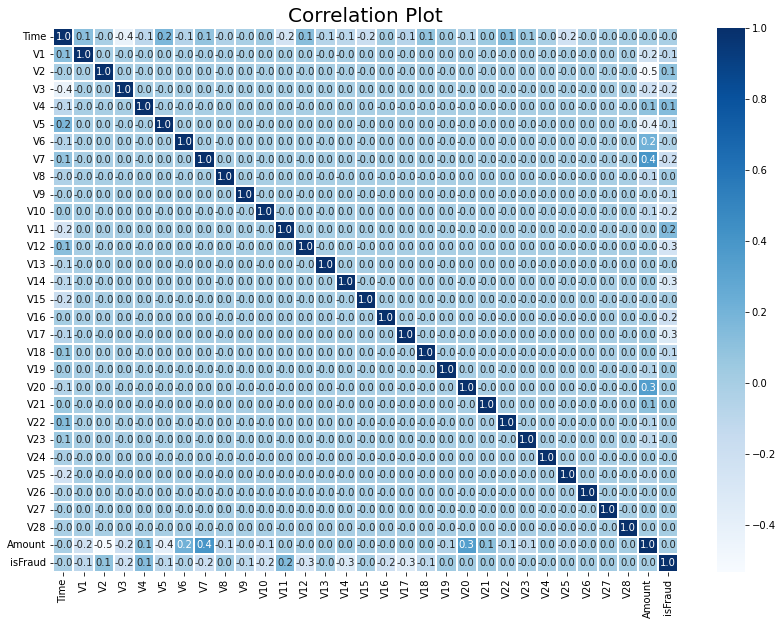

In [8]:
#Correlation Plot
plt.figure(figsize = (14,10))
plt.title('Correlation Plot', size = 20)
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues",fmt='.1f',annot=True)
plt.show()

In [9]:
# Defining x and y
y = data["isFraud"]
x = data.drop(["isFraud"], axis = 1)

In [10]:
#Standardization
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("Balanced Dataset")
plt.show()

In [ ]:
# DNN
layers = keras.layers
model = keras.Sequential([
layers.Dense(input_dim = 30, units = 128, activation = "relu"),
layers.Dense(units= 64, activation = "relu"),
layers.Dropout(0.2),
layers.Dense(units= 32, activation = "relu"),
layers.Dropout(0.2),
layers.Dense(units= 32, activation = "relu"),
layers.Dropout(0.2),
layers.Dense(units= 16, activation = "relu"),
layers.Dropout(0.2),
layers.Dense(units=1, activation = "sigmoid")])
model.summary()

In [ ]:
# Metrics
metrics = [
    keras.metrics.Accuracy(name="Accuracy"),
    keras.metrics.Precision(name="Precision"),
    keras.metrics.Recall(name="Recall")]
# Compiling and fiting the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
model.fit(X_train_SMOTE, y_train_SMOTE, batch_size = 32, epochs = 100)
print("Evaluate on test data")
score = model.evaluate(X_test, y_test)
print("test loss, test accuracy, test precision, test recall:", score)

In [ ]:
model.summary()

In [ ]:
model.save('saved_model/epoch_100')

In [12]:
! pip install openvino-dev[tensorflow2,onnx]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 166.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 251.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.0/518.0 kB 326.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 278.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 301.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 274.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 283.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 183.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 307.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 327.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 283.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━

In [13]:
! mo --saved_model_dir saved_model/epoch_100

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	None
	- Path for generated IR: 	/opt/app-root/src/fraud-detection/.
	- IR output name: 	saved_model
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Source layout: 	Not specified
	- Target layout: 	Not specified
	- Layout: 	Not specified
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- User transformations: 	Not specified
	- Reverse input channels: 	False
	- Enable IR generation for fixed input shape: 	False
	- Use the transformations config file: 	None
Advanced parameters:
	- Force the usage of legacy Frontend of Model Optimizer for model conversion into IR: 	False
	- Force the usage of new Frontend of Model Optimize

In [21]:
# Below this cell and subsequent cells are activities related to prediction
model = tf.keras.models.load_model('saved_model/epoch_100')

2022-12-12 18:30:48.424491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-12 18:30:48.424533: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 18:30:48.424558: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-nb-sughosh-0): /proc/driver/nvidia/version does not exist
2022-12-12 18:30:48.424820: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# ## YOU MUST PASTE YOUR OWN ROUTE INFORMATION HERE
my_route = 'http://model-server-sample-ovms-sughosh-dev.apps.sandbox-m2.ll9k.p1.openshiftapps.com'
sub_path = '/v1/models/smote/versions/1'
# ## YOU MUST PASTE YOUR OWN ROUTE INFORMATION HERE


import requests, json
my_req = '{"instances": [[-0.81527562, -0.62780094,  1.18457726, -0.56138278,  1.97545981, -1.38669424, -0.03372776, -1.08378356, -0.46514641, -1.07813139, -2.98031409,  2.29087639, -2.82230106, 0.76695155, -5.65368683, 0.04526619, -4.77118557, -5.04520325, -3.02616084,  1.14274513, 0.35082495,  1.64467922,  0.38254332,  0.03085198,  0.83964697, -0.38594229, -0.51760032,  1.39294962,  0.22815041, 0.3301235]]}'
# my_req = '{"instances": [[1.31445961, -0.17854688, 0.56477646, 0.09430623, -0.46407724, 0.84751917, -0.55046642, 0.81641881, -0.05950402, -0.27496291, -1.09510609, -0.83743209, -0.62095535, -0.81030155, -0.80413334, -0.11816435, 0.29553654, 0.57938864, -0.1771897, -0.18193074, -0.12517763, -0.36967874, -1.14814439, -0.04861747,0.80911052, -0.77658417, 0.27860292, 0.19034682, 0.53187267, -0.34531318]]}'
# X_test.tolist()
# my_req = '{' + json.dumps(X_test.tolist()) + '}'
# my_req
response = requests.post(my_route + sub_path +':predict', my_req)
response.json()

{'predictions': [[1.0]]}

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [16]:
X_test[]

array([[ 0.652946  , -0.16507624,  0.64037522, ...,  0.26879556,
         0.48817819, -0.19330595],
       [ 1.31445961, -0.17854688,  0.56477646, ...,  0.19034682,
         0.53187267, -0.34531318],
       [ 1.21413967, -0.82438204, -1.45737386, ...,  0.70927293,
         1.32488582,  0.03058688],
       ...,
       [ 0.89149016,  0.57456805, -1.38617477, ..., -0.59675044,
        -0.02270447,  1.97849446],
       [ 1.3914895 ,  1.05420191,  0.17271064, ..., -0.25558457,
        -0.18705451, -0.34143504],
       [ 1.22709029,  1.2004855 , -0.80253225, ...,  0.01800948,
        -0.1564285 , -0.2932581 ]])

In [25]:
#Converting X_test array to numpy array before predicting
pred = model.predict(np.array(X_test))
pred = np.where(pred > 0.5, 1, 0)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
# Checking accuracy of the prediction by the model.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.999420666409185

In [27]:
# Because it was an imbalanced dataset and the SMOTE technique was applied to training set and
# not testing set therefore the above accuracy is not correct but the f1 score below gives a better accuracy.
from sklearn.metrics import f1_score
f1_score(y_test, pred, zero_division=1)

0.8341708542713568

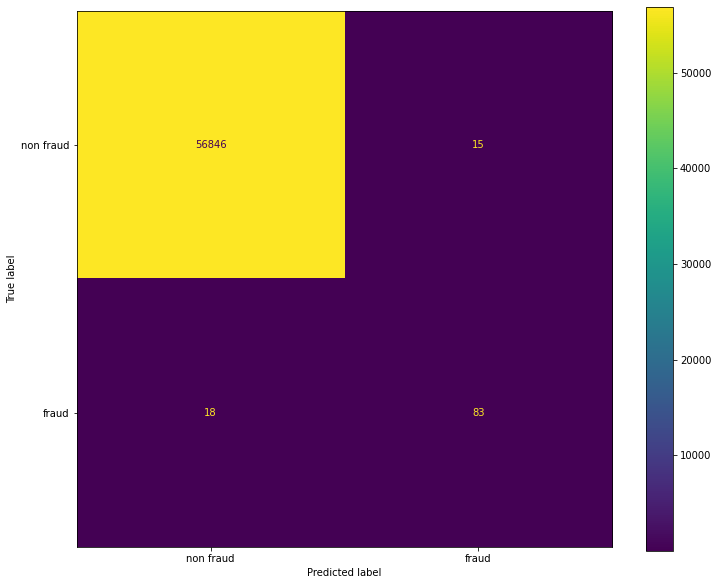

In [28]:
# The cofusionmatrix and the plotting shows how many wrong prediction our model did because it is not perfect. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non fraud', 'fraud'])
disp.plot()
plt.show()

In [17]:
# the below code tell me which indexes in y_test are fraud. consequently those indicies in X_test 
# can be feed to the model to check if it predicting correctly. Chances are high it will because 
# it from the same dataset using which it was trained.
np.where(y_test == 1)

(array([  365,  1156,  3037,  3100,  4307,  4608,  5286,  5307,  6730,
         6893,  6940,  7131,  7496,  7878,  8072,  8139,  8227,  8374,
         8741,  8861,  9062,  9140,  9744,  9757,  9941, 10291, 10339,
        11693, 12389, 13034, 13384, 13797, 14955, 16008, 16410, 16460,
        17493, 18527, 19111, 19346, 20371, 20429, 20827, 22124, 22496,
        23102, 23204, 23387, 24496, 24520, 24643, 25629, 27509, 28185,
        28370, 28764, 29738, 30244, 30986, 31059, 31927, 32179, 34368,
        35320, 37076, 37501, 37652, 38679, 39034, 41201, 41434, 42156,
        42564, 42672, 43007, 43359, 43681, 44464, 45002, 45249, 45485,
        45512, 45792, 46053, 46434, 46903, 47099, 47582, 47873, 48825,
        49663, 49928, 50129, 51817, 52172, 52244, 52623, 52687, 52983,
        53225, 56539]),)

In [29]:
! oc whoami

system:serviceaccount:rhods-notebooks:jupyter-nb-sughosh
